In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
puducherry_meteo = pd.read_csv('/kaggle/input/puducherry-aqi/Puducherry/Metrological Data/Puducherry.csv', delimiter=',')
puducherry_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,22.3,88,0.0,1012.5,12.2,21.3,341,355
1,2024-01-01T01:00,22.2,88,0.0,1013.6,13.1,23.8,344,357
2,2024-01-01T02:00,22.9,86,0.0,1014.7,13.6,23.8,348,360
3,2024-01-01T03:00,24.4,83,0.0,1015.5,12.6,18.7,357,1
4,2024-01-01T04:00,25.8,79,0.0,1015.7,14.0,18.4,23,23
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,24.8,88,0.0,1013.3,17.9,27.7,19,22
8780,2024-12-31T20:00,24.6,87,0.0,1012.5,17.8,27.4,18,20
8781,2024-12-31T21:00,24.3,89,0.0,1011.8,17.9,27.7,13,16
8782,2024-12-31T22:00,24.1,89,0.0,1011.2,17.6,27.2,14,16


In [3]:
puducherry_pollutants = pd.read_csv('/kaggle/input/puducherry-aqi/Puducherry/Pollutants/Puducherry.csv', delimiter= ',')
puducherry_pollutants['Timestamp'] = puducherry_meteo['time']
puducherry_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
puducherry_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,64.00,81.00,1.65,13.60,8.57,10.20,5.05,1.25,34.64,...,NaN,25.50,85.00,0.80,52.25,0.0,0.0,2.5,760.25,NaN
1,2024-01-01T01:00,76.25,88.25,2.25,15.65,10.12,10.10,3.48,1.20,35.02,...,NaN,25.35,85.25,1.05,45.75,0.0,0.0,2.5,759.75,NaN
2,2024-01-01T02:00,65.50,79.50,1.50,12.25,7.75,10.05,4.70,1.02,38.98,...,NaN,24.90,85.25,1.27,48.25,0.0,0.0,2.0,759.00,NaN
3,2024-01-01T03:00,57.67,69.75,1.02,8.85,5.55,10.32,7.15,0.97,35.98,...,NaN,24.45,86.25,1.52,55.75,0.0,0.0,2.0,759.00,NaN
4,2024-01-01T04:00,59.75,77.25,1.50,11.55,7.35,11.60,3.80,1.06,25.08,...,NaN,24.10,87.50,1.65,53.25,0.0,0.0,2.0,759.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,54.25,76.00,3.42,26.85,17.10,11.50,7.70,0.77,59.36,...,NaN,24.40,84.50,0.92,156.50,0.0,0.0,2.0,758.00,NaN
8780,2024-12-31T20:00,55.25,79.50,3.45,26.75,17.00,11.40,9.12,0.78,59.29,...,NaN,24.02,87.75,0.35,152.75,0.0,0.0,2.0,758.75,NaN
8781,2024-12-31T21:00,56.50,81.50,2.68,21.62,13.70,12.18,9.90,0.71,60.76,...,NaN,23.55,91.25,0.30,146.50,0.0,0.0,2.0,759.00,NaN
8782,2024-12-31T22:00,56.25,82.00,1.78,19.40,11.78,11.80,9.52,0.66,58.10,...,NaN,23.20,92.50,0.30,146.00,0.0,0.0,2.0,759.00,NaN


In [4]:
puducherry = pd.merge(puducherry_meteo.iloc[:, :], puducherry_pollutants.iloc[:, 0:3], on='time')
puducherry

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,22.3,88,0.0,1012.5,12.2,21.3,341,355,64.00,81.00
1,2024-01-01T01:00,22.2,88,0.0,1013.6,13.1,23.8,344,357,76.25,88.25
2,2024-01-01T02:00,22.9,86,0.0,1014.7,13.6,23.8,348,360,65.50,79.50
3,2024-01-01T03:00,24.4,83,0.0,1015.5,12.6,18.7,357,1,57.67,69.75
4,2024-01-01T04:00,25.8,79,0.0,1015.7,14.0,18.4,23,23,59.75,77.25
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,24.8,88,0.0,1013.3,17.9,27.7,19,22,54.25,76.00
8780,2024-12-31T20:00,24.6,87,0.0,1012.5,17.8,27.4,18,20,55.25,79.50
8781,2024-12-31T21:00,24.3,89,0.0,1011.8,17.9,27.7,13,16,56.50,81.50
8782,2024-12-31T22:00,24.1,89,0.0,1011.2,17.6,27.2,14,16,56.25,82.00


In [5]:
puducherry['city'] = 'Puducherry'
puducherry

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,22.3,88,0.0,1012.5,12.2,21.3,341,355,64.00,81.00,Puducherry
1,2024-01-01T01:00,22.2,88,0.0,1013.6,13.1,23.8,344,357,76.25,88.25,Puducherry
2,2024-01-01T02:00,22.9,86,0.0,1014.7,13.6,23.8,348,360,65.50,79.50,Puducherry
3,2024-01-01T03:00,24.4,83,0.0,1015.5,12.6,18.7,357,1,57.67,69.75,Puducherry
4,2024-01-01T04:00,25.8,79,0.0,1015.7,14.0,18.4,23,23,59.75,77.25,Puducherry
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,24.8,88,0.0,1013.3,17.9,27.7,19,22,54.25,76.00,Puducherry
8780,2024-12-31T20:00,24.6,87,0.0,1012.5,17.8,27.4,18,20,55.25,79.50,Puducherry
8781,2024-12-31T21:00,24.3,89,0.0,1011.8,17.9,27.7,13,16,56.50,81.50,Puducherry
8782,2024-12-31T22:00,24.1,89,0.0,1011.2,17.6,27.2,14,16,56.25,82.00,Puducherry


In [6]:
puducherry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8086 non-null   float64
 10  PM10 (µg/m³)              8319 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
puducherry = puducherry.interpolate()
puducherry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    puducherry[delay1_col] = puducherry[col].shift(1)
    delay2_col = col + "_delay2"
    puducherry[delay2_col] = puducherry[col].shift(2)
    puducherry.loc[0, delay1_col] = puducherry[col].iloc[-1]
    puducherry.loc[1, delay2_col] = puducherry[col].iloc[-1]
    puducherry.loc[0, delay2_col] = puducherry[col].iloc[-2]

puducherry

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,22.3,88,0.0,1012.5,12.2,21.3,341,355,64.00,81.00,Puducherry,51.00,56.25,79.00,82.00
1,2024-01-01T01:00,22.2,88,0.0,1013.6,13.1,23.8,344,357,76.25,88.25,Puducherry,64.00,51.00,81.00,79.00
2,2024-01-01T02:00,22.9,86,0.0,1014.7,13.6,23.8,348,360,65.50,79.50,Puducherry,76.25,64.00,88.25,81.00
3,2024-01-01T03:00,24.4,83,0.0,1015.5,12.6,18.7,357,1,57.67,69.75,Puducherry,65.50,76.25,79.50,88.25
4,2024-01-01T04:00,25.8,79,0.0,1015.7,14.0,18.4,23,23,59.75,77.25,Puducherry,57.67,65.50,69.75,79.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,24.8,88,0.0,1013.3,17.9,27.7,19,22,54.25,76.00,Puducherry,46.50,44.75,72.00,67.00
8780,2024-12-31T20:00,24.6,87,0.0,1012.5,17.8,27.4,18,20,55.25,79.50,Puducherry,54.25,46.50,76.00,72.00
8781,2024-12-31T21:00,24.3,89,0.0,1011.8,17.9,27.7,13,16,56.50,81.50,Puducherry,55.25,54.25,79.50,76.00
8782,2024-12-31T22:00,24.1,89,0.0,1011.2,17.6,27.2,14,16,56.25,82.00,Puducherry,56.50,55.25,81.50,79.50


In [9]:
puducherry['city'] = puducherry['city'].astype('category')

In [10]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [11]:
X, y = puducherry[input_cols], puducherry[target_cols]

In [12]:
from xgboost import XGBRegressor

In [13]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=50,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [14]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
pred_check = model.predict(X)

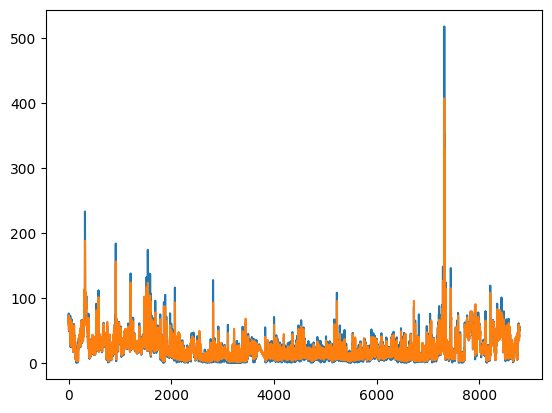

In [16]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [17]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9081519971071458


In [19]:
import joblib
joblib.dump(model, 'Puducherry_PM2.5_µgm³.pkl')

['Puducherry_PM2.5_µgm³.pkl']

In [20]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
pred_check2 = model.predict(X)

In [22]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9207319328875394


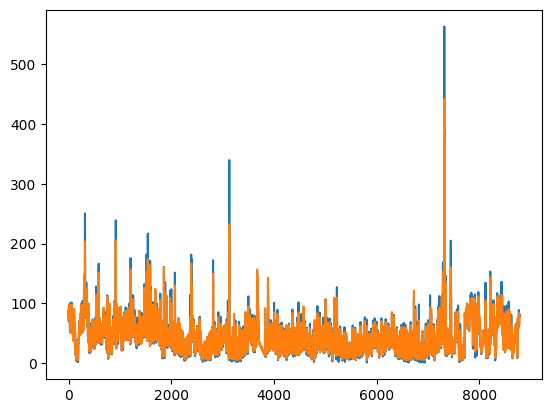

In [23]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [24]:
joblib.dump(model, 'Puducherry_PM10_µgm³.pkl')

['Puducherry_PM10_µgm³.pkl']